# It's Movie Time (Data Cleaning Case Study)

<img src="movie_time2.jpg" height="300px" width="700px"/>

#### Lights! Camera! Data!

Once upon a time in the enchanting world of cinema, there existed a vast dataset, shrouded in darkness and plagued by dirtiness. This dataset, a treasure trove of information about movies from different genres, held the potential to reveal hidden insights, understand audience preferences, and unlock the secret formula for cinematic success. 


The dataset was a hot mess, tangled like a twisted plotline. Missing titles, jumbled genres, sneaky duplicates were lurking at every turn and many more catastrophe.

How do they make sense of this? With a data filled with so many insights to make powerful decisions but alas, it was trapped in a state of chaos and disorder, crying out for the intervention of a skilled data wizards.

My team and I (Team 13) happened to pass this enchanting world along one of our Analytic Journeys and we heard the cry.... Not of the people, but of the data.

Do you want to hear what the cry sounds like?.... it only said "Help", what a boring a cry :)

We vouched to help this data, to help this enchanting world and we did it with our trusty magic tool which isnt "Abrakadabra"... our magic tool is **Python**

#### Let's Begin

To start this magical quest, we need to call upon the spirits to guide us and be with us on this Journey. The spirits are our **python Libraries**, for each spirit we call upon gives us the power to clean parts of this dataset 

In [180]:
# import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Suddenly, One of the spirit possesses one of the wizards and the wizard said, **Bring the Data to my Chamber, I need to see what I am dealing with**

In [181]:
# loading the dataset 
df= pd.read_csv('movies.csv')

# sample of the file
df.sample(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
4765,Troll,(2022),"\nAction, Adventure, Fantasy",NaN,"\nDeep in the Dovre mountain, something gigant...",\n Director:\nRoar Uthaug\n,NaN,NaN,NaN
9097,Power Rangers: Dino Fury,(2021),"\nAction, Adventure, Comedy",9.2,\nAmelia hunts for ghosts at a creepy mansion....,\n Director:\nCharlie Haskell\n| \n Star...,13,21.0,NaN
6458,Bruno Motta: Melhor que os Outros Stand Ups qu...,(2017 TV Special),\nComedy,NaN,\nThis live stand up comedy special is a compi...,\n Director:\nDaniel Pacífico\n| \n Star...,NaN,66.0,NaN
3809,Castle & Castle,(2018– ),\nDrama,8.6,"\nA drama series set in a law firm, Castle and...","\n \n Stars:\nDakore Akande, \nB...",76,NaN,NaN
1318,Liu lang di qiu,(2019),"\nAction, Adventure, Sci-Fi",6.0,"\nAs the sun is dying out, people all around t...",\n Director:\nFrant Gwo\n| \n Stars:\nJi...,"28,264",125.0,$5.88M
6786,Baby,(2018–2020),\nDrama,7.8,\nChiara gets a peace offering from her dad. C...,\n Director:\nAndrea De Sica\n| \n Stars...,131,49.0,NaN
6451,Metro,(2008),\nDrama,NaN,\nThe dark heart of the city is the setting fo...,\n Director:\nChristopher Dorrah\n| \n S...,NaN,120.0,NaN
2158,Fear City: New York vs the Mafia,(2020),"\nDocumentary, Crime",7.1,\nFive Mafia families ruled New York with a bl...,"\n \n Stars:\nJohn Alite, \nMich...","6,352",156.0,NaN
282,The Tudors,(2007–2010),"\nDrama, History, Romance",8.1,\nA dramatic series about the reign and marria...,\n \n Stars:\nJonathan Rhys Meye...,"70,514",60.0,NaN
642,Project Power,(2020),"\nAction, Crime, Sci-Fi",6.0,\nWhen a pill that gives its users unpredictab...,"\n Directors:\nHenry Joost, \nAriel Schulma...","77,538",113.0,NaN


In [182]:
df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

### Wizard's Request

Wizard: **Data! I call upon thee**

Data: **I heareth thee, What can I do for you?**

Wizard: **What is wrong with you?**

Data: **I am dirty, I need help cleaning myself up**

Wizard: **What can I do to help you?**

Data: **You have to do the following**

<img src = "downloaded.png" />

Data: **To clean me up, you need to do the following**

- Remove duplicate values from the movies column
- Clean the year column to get the appropriate year
- Get the first genre from the genre column
- Clean the rating column
- Get the director name and put it in a different column and also put the stars names in a separate column
- Clean the votes column
- Clean the runtime column
- Clean the gross column


Wizard: **Alright boys lets get to work!, we are going to do this step by step**

### Making a copy of the dataset

In [183]:
# to amke a copy of the dataset
df_unclean = df.copy()

Now we can clean the dataframe `df` since the unclean copy is stored as `df_unclean`

### Clean the column headers first

FIrst, we would be making the column headers to be in lower case which would be easier to work with

In [184]:
# change the column names to lower case
df.columns = df.columns.str.lower()

# to check if the code works
df.columns

Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')

### What is the shape of the dataset?

In [185]:
# to get the shape of the dataset
df.shape

(9999, 9)

The dataset has 9 columns and 9999 rows


### Data Dictionary

After observing the column names, I generated a data dictionary for the dataset

**Data Dictionary**:

- `movies`: This column represents the names of the movies in the dataset. It contains textual data (string).

- `year`: This column represents the release year of the movies. It contains numerical data (integer or float) representing the year.

- `genre`: This column represents the genre or category of the movies. It contains textual data (string).

- `rating`: This column represents the rating of the movies. It contains textual data (string or categorical data) indicating the rating.

- `one-line`: This column represents a one-line description or summary of the movies. It contains textual data (string).

- `stars`: This column represents the stars or actors/actresses associated with the movies. It contains textual data (string).

- `votes`: This column represents the number of votes received by the movies. It contains numerical data (integer or float) indicating the count of votes.

- `runtime`: This column represents the duration or runtime of the movies. It contains numerical data (integer or float) representing the duration in minutes.

- `gross`: This column represents the gross earnings or revenue generated by the movies. It contains numerical data (integer or float) representing the amount in a specific currency.

Now let us proceed to cleaning the data


NB: This data dictionary was generated by ChatGPT

### Cleaning Step 1: Removing Duplicates in the movie column

First let me check how many duplicates are there in the `movies` column

In [186]:
# check for duplicates
df['movies'].duplicated().value_counts()

False    6817
True     3182
Name: movies, dtype: int64

In [187]:
# what is the percentae of duplicate movies
duplicated_perc = df['movies'].duplicated().value_counts()[1]/df.duplicated().value_counts()[0]*100

# print out results
print(f"{round(duplicated_perc, 2)}% of the data is duplicated on the 'movie' column")

33.26% of the data is duplicated on the 'movie' column


**Let's drop these duplicate records**

In [188]:
# drop duplicates and reset the index
df = df.drop_duplicates(subset='movies', keep="first").reset_index(drop=True)

# check if the duplicates were dropped
df.duplicated().value_counts()

False    6817
dtype: int64

**The Duplicates in the `movies` Column has been taken care of**

### Cleaning Step 2: Clean the year column to get the appropriate year

Let us look at the `year` column

In [189]:
# to check out the year column
df['year'].unique()

array(['(2021)', '(2021– )', '(2010–2022)', '(2013– )', '(2020– )',
       '(2006–2013)', '(2019– )', '(2016–2021)', '(2011– )', '(2005– )',
       '(2008–2013)', '(2017– )', '(2017–2021)', '(2016– )',
       '(1994–2004)', '(2014– )', '(2013–2020)', '(2015– )',
       '(2005–2020)', '(2013–2022)', '(2003– )', '(2009–2020)',
       '(I) (2018– )', '(2010–2015)', '(2011–2019)', '(2015–2020)',
       '(2005–2014)', '(2009–2015)', '(2008–2014)', '(2016–2018)',
       '(2009–2017)', '(2020)', '(2018–2021)', '(2017–2020)',
       '(1987–1994)', '(2018– )', '(2012– )', '(2014–2020)',
       '(2011–2018)', '(2005–2017)', '(2017)', '(2007–2015)',
       '(2000–2007)', '(II) (2007– )', '(1993)', '(1999–2022)',
       '(2015–2018)', '(2014–2019)', '(2016)', '(2012–2020)',
       '(2013–2019)', '(2007–2012)', '(2011–2020)', '(2010–2017)',
       '(2000–2015)', '(2015–2021)', '(2001)', '(1997– )', '(2011–2017)',
       '(1993–1999)', '(1989–1998)', '(2010–2013)', '(2010–2020)',
       '(2003–2019)

**That is really messy**..... To Clean the year column. We would extract the first four numeric values as the year

In [190]:
# extract the first four numeric characters as the year 
df['year'] = df['year'].str.extract(r'(\d{4})')

# to check if it worked
df['year'].unique()

array(['2021', '2010', '2013', '2020', '2006', '2019', '2016', '2011',
       '2005', '2008', '2017', '1994', '2014', '2015', '2003', '2009',
       '2018', '1987', '2012', '2007', '2000', '1993', '1999', '2001',
       '1997', '1989', '1975', '1995', '1984', '1998', '1966', '1990',
       '2002', '1976', '1978', '2022', '1982', '1968', '2004', '1996',
       '1971', '1980', '1962', '1960', '1988', '1969', '1961', '1979',
       '1956', '1983', nan, '1986', '1967', '1974', '1992', '1958',
       '1932', '1941', '1991', '1950', '1981', '1952', '1957', '1954',
       '1955', '1948', '1947', '1946', '1977', '2023', '1945', '1953',
       '1985', '1973', '1972', '1965', '1944', '1933', '1938'],
      dtype=object)

**Now That Looks Clean**, Let me change the datatype to integer 

In [191]:
# convert the year column to integer
df['year'] = df['year'].astype('Int64')

# to check if it was changed
df['year'].dtype

Int64Dtype()

Before I conclude with this column, I noticed that there are null values in the column

Let us find out how many null values

In [192]:
# counting null values
df['year'].isna().sum()

542

There are 542 null values in the `year` column. The best way to handle this missing values is to research for the names of these movies and fill in the actual release year of the movies. I would also give a hint on how to track the missing release years for the movies.

The years in the `year` column go from 1938 till 2023. I want to find the years that are not in the range maybe they could be the missing years or could give us a scope of years that movies were not released

In [235]:
# Assuming the column name is "year" where the years are stored
year_column = df['year']

# Create a set of unique years in the column
unique_years = set(year_column)

# Generate a set of all years from 1938 to 2021
all_years = set(range(1938, 2022))

# Find the missing year(s)
missing_years = all_years - unique_years

print(f"The missing year(s) between 1938 and 2023: {missing_years}")

The missing year(s) between 1938 and 2023: {1959, 1963, 1964, 1970, 1939, 1940, 1942, 1943, 1949, 1951}


These are the years that have no movies released in those years. This could give a clue in tracking down the missing release years

### Cleaning Step 3: Get the first genre from the genre column

To check what is in the `genre` column

In [194]:
# to see a sample of the genre column
df['genre'].sample(10)

4063                           \nDrama            
2727                          \nComedy            
713            \nCrime, Drama, Mystery            
2450                 \nComedy, Musical            
5958    \nAnimation, Action, Adventure            
1833                      \nReality-TV            
659       \nAction, Adventure, Fantasy            
1988        \nDrama, Mystery, Thriller            
852                           \nComedy            
5527                           \nShort            
Name: genre, dtype: object

To get the first genre from each row

In [195]:
# extract the first genre 
df['genre'] = df['genre'].str.split(',').str[0].str.strip()


# to check if it worked
df['genre'].sample(10)

2478    Documentary
1431          Crime
5411      Animation
4041          Drama
3450          Drama
2800          Drama
4591         Comedy
6642         Comedy
3365          Drama
5273          Drama
Name: genre, dtype: object

Let me check the distribution of the `genre` column

In [196]:
# check the values
df.genre.value_counts()

Comedy         1491
Drama          1164
Documentary    1002
Animation       917
Action          821
Crime           394
Adventure       152
Horror          149
Biography       141
Reality-TV      133
Short            66
Thriller         65
Family           52
Romance          37
Game-Show        31
Fantasy          30
Mystery          22
Music            19
Sci-Fi           18
Talk-Show        17
Sport             6
Western           6
News              5
Musical           4
History           2
Film-Noir         1
War               1
Name: genre, dtype: int64

Let me check if there are null values in the `genre` column

In [197]:
df['genre'].isnull().sum()

71

According to [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/), There are different ways to handle null values in a column containing categorical variables and from the methods listed, in the website, I would fill in the null values with the mode genre

In [198]:
# Calculate the mode of the 'genre' column
genre_mode = df['genre'].mode().iloc[0]

# Fill missing values with the mode
df['genre'].fillna(genre_mode, inplace=True)

# to check if it worked
df['genre'].isna().sum()

0

In [199]:
# to check the count of the genre column
df.genre.value_counts()

Comedy         1562
Drama          1164
Documentary    1002
Animation       917
Action          821
Crime           394
Adventure       152
Horror          149
Biography       141
Reality-TV      133
Short            66
Thriller         65
Family           52
Romance          37
Game-Show        31
Fantasy          30
Mystery          22
Music            19
Sci-Fi           18
Talk-Show        17
Sport             6
Western           6
News              5
Musical           4
History           2
Film-Noir         1
War               1
Name: genre, dtype: int64

The `genre` column is clean

### Cleaning Step 4: Clean the rating column

Before we clean the rating column, we would like the check the distribution of the `rating` column

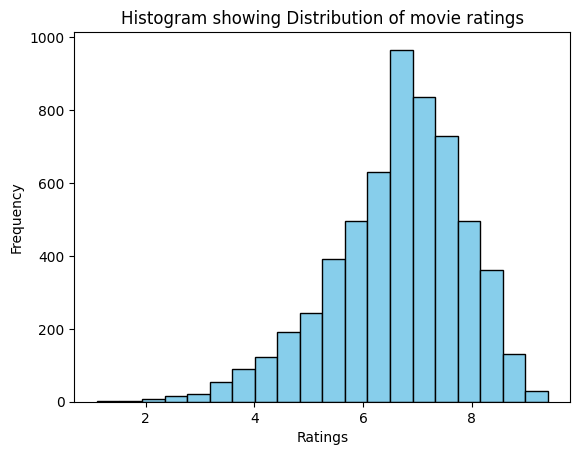

In [200]:
# Plot the distribution of the rating column
plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Ratings')  # Corrected: Use plt.xlabel instead of plt.set_xlabel
plt.ylabel('Frequency')  # Corrected: Use plt.ylabel instead of plt.set_ylabel
plt.title('Histogram showing Distribution of movie ratings')  # Corrected: Use plt.title instead of plt.set_title

# Display the histogram
plt.show()

From the image above the distribution is skewed to the left. Next let me check if there are outliers in my rating column

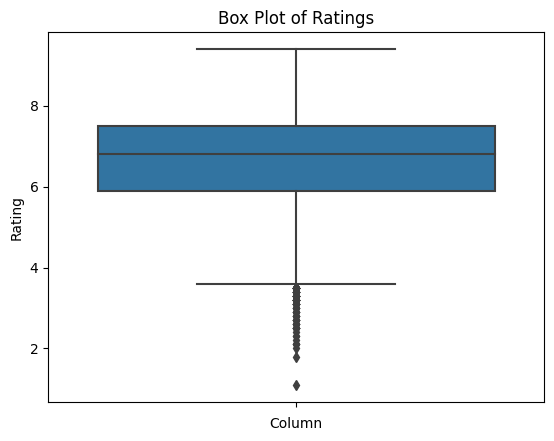

In [201]:
# Plotting the violin plot
sns.boxplot(data=df, y='rating')
plt.xlabel('Column')
plt.ylabel('Rating')
plt.title('Box Plot of Ratings')
plt.grid(False)
plt.show()

In [202]:
# to check the descriptive statistics of the ratings column
df['rating'].describe()

count    5815.000000
mean        6.635529
std         1.210105
min         1.100000
25%         5.900000
50%         6.800000
75%         7.500000
max         9.400000
Name: rating, dtype: float64

I am going to use a python script to detect outliers in my column using statistical methods called interquartile range

In [203]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
    q1 =df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers


# to print out the outliers
outliers = find_outliers_IQR(df['rating'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
outliers

number of outliers: 100
max outlier value: 3.5
min outlier value: 1.1


56      3.3
415     2.7
460     3.1
610     2.8
807     3.5
       ... 
5974    2.8
6054    3.0
6066    3.0
6139    3.2
6229    3.1
Name: rating, Length: 100, dtype: float64

**Now to handle the outlier values**

To handle the outliers, I am going to be using the "Capping" technique. In this technique, we essentially set a limit for the min and max outlier values. Anything above or below the cap gets set to the capped min or max respectively

To cap the outliers, We will calculate a upper limit and lower limit. For the upper limit, we will use 10 because our ratings cannot go above 10. For the lower limit, we will 3.5 being the maximum outlier value

In [204]:
# to get out upper and lower limit
upper_limit = 10
lower_limit = 3.5

# to replace the outliers
df['rating'] = np.where(df['rating'] > upper_limit,
   upper_limit, np.where(df['rating'] < lower_limit, lower_limit, df['rating']))

# to check if there are still outliers in the dataset
print(df['rating'].min())
print(df['rating'].max())

3.5
9.4


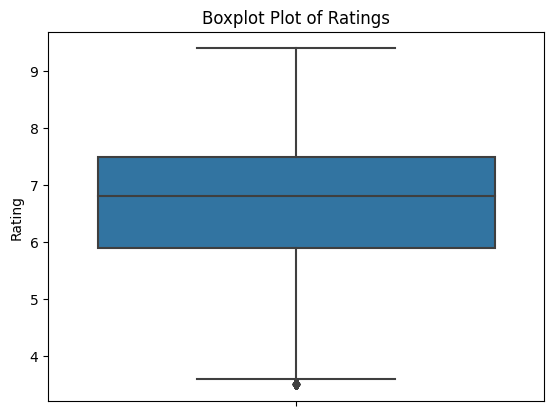

In [205]:
#to check using the box plot 
sns.boxplot(data=df, y='rating')
plt.ylabel('Rating')
plt.title('Boxplot Plot of Ratings')
plt.grid(False)
plt.show()

**Outliers have been taken care of**

Next is to check for null values

In [206]:
# to check for null values in the dataset
df['rating'].isna().sum()

1002

Before I handle the null values, I would like to check if the null values have votes. This would confirm if I should give ratings to the column or not

In [207]:
# to confirm if there are any votes for ratings with null
novotes_df = df[df['rating'].isna()]

novotes_df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
4,Army of Thieves,2021,Action,NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
24,He-Man and the Masters of the Universe,2021,Animation,NaN,\nEternia's Prince Adam discovers the power of...,\n,NaN,NaN,NaN
214,Sing 2,2021,Animation,NaN,\nBuster Moon and his friends must persuade re...,\n Director:\nGarth Jennings\n| \n Stars...,NaN,NaN,NaN
217,Knives Out 2,2022,Comedy,NaN,\nPlot unknown. Sequel to the 2019 film 'Knive...,\n Director:\nRian Johnson\n| \n Stars:\...,NaN,NaN,NaN
222,Don't Look Up,2021,Comedy,NaN,"\nThe story of two low-level astronomers, who ...",\n Director:\nAdam McKay\n| \n Stars:\nT...,NaN,145.0,NaN


to count the number of null values in this column to see if it corresponds to 1002 from the count of null values in the rating column

In [208]:
novotes_df['votes'].isna().sum()

1002

This means that where there were no rating, there were no votes at all. To handle the null values in the ratings column, I would have replaced them with zero but that would mean giving them a poor rating when no one actually gave them a rating. 

I have decided to replace null Values with "No Rating"

In [209]:
# Replace null values with the mean
df['rating'].fillna("No Rating", inplace=True)

In [211]:
# to check if there are still null values
df['rating'].isna().sum()

0

**The Rating Column is cleaned**

### Cleaning Step 5: Get the director name and put it in a different column and also put the stars names in a separate column

To clean the star column, I would first observe the values of the star column

In [212]:
# to observe the star column
df['stars'].sample(5)

4298    \n    Director:\nPeter Mackenzie\n| \n    Star...
5685    \n    Director:\nEric Juhola\n| \n    Stars:\n...
426     \n            \n    Stars:\nJonah Hill, \nEmma...
6433    \n    Director:\nOliver Driver\n| \n    Stars:...
392     \n            \n    Stars:\nAlison Brie, \nMar...
Name: stars, dtype: object

Before I start extracting the director and the stars, I would first extract the "\n" character and the extra spaces

In [213]:
# replace the \n character with a space
df['stars'] = df['stars'].str.replace('\n', '')

# strip the leading and trailing spaces
df['stars'] = df['stars'].str.strip()

# to check if it worked
df['stars'].sample(5)

1518    Stars:Marilou Aussilloux, Coline Beal, Amir El...
6208    Director:Clementine Malpas|     Stars:Lynsey A...
2311    Director:Jae-hyun Jang|     Stars:Yoo Ji-Tae, ...
5770                                                     
3290    Director:Doug Campbell|     Stars:Eric Roberts...
Name: stars, dtype: object

Next step is to separate the stars and the director. This would be done with the help of regex expressions

In [214]:
# Director:(.*?)\| captures the text after "Director:" and before the "|" symbol
df['director'] = df['stars'].str.extract(r'Directors?:(.*?)\|', flags=re.IGNORECASE)[0].str.strip()

#Stars:(.*) captures the text after "Stars:" as the stars information.
df['starring'] = df['stars'].str.extract(r'Stars?:(.*)', flags=re.IGNORECASE)[0].str.strip()

In [215]:
# to check if the column was cleaned 
df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director,starring
0,Blood Red Sky,2021,Action,6.1,\nA woman with a mysterious illness is forced ...,Director:Peter Thorwarth| Stars:Peri Baume...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,Animation,5.0,\nThe war for Eternia begins again in what may...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010,Drama,8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,Animation,9.2,\nAn animated series that follows the exploits...,"Stars:Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,NaN,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,Action,No Rating,"\nA prequel, set before the events of Army of ...",Director:Matthias Schweighöfer| Stars:Matt...,NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


Next step is to drop the column that is unclean, from the dataset

In [216]:
# Drop the 'stars' column
df.drop('stars', axis=1, inplace=True)

# to check if it actually worked
df.columns

Index(['movies', 'year', 'genre', 'rating', 'one-line', 'votes', 'runtime',
       'gross', 'director', 'starring'],
      dtype='object')

**Cleaning Task 5 Done**

### Cleaning Task 6: Clean the votes column

Before cleaning the voting column, I would love to observe the column values

In [217]:
# observing the values
df.votes

0        21,062
1        17,870
2       885,805
3       414,849
4           NaN
         ...   
6812        NaN
6813        NaN
6814        NaN
6815        NaN
6816        NaN
Name: votes, Length: 6817, dtype: object

First is to replace the " , " present in the column and change the datatype to integer

In [218]:
# remove commas and convert to integer
df['votes'] = df['votes'].str.replace(',', '')

# changes the datatype to integer
df['votes'] = df['votes'].astype('Int64')


# to check if it worked
df['votes'].dtype

Int64Dtype()

Let me check the presence of null values  

In [219]:
df['votes'].isna().sum()

1002

To handle this, We would be filling the column with zeros. Reason because these are individual votes and it is very possible that some individuals did not want to vote for the movies

In [220]:
# Replace null values with zero
df['votes'].fillna(0, inplace=True)

# to check if it worked
df['votes'].isna().sum()

0

We would not be checking for outliers in this column because it is very possible some teams didnt get a vote from people and the most loved team could get really high number of votes. So with that been said...

**The `votes` column is clean**

### Cleaning Task 7: Clean the runtime column

First let us check the distribution of the runtime column

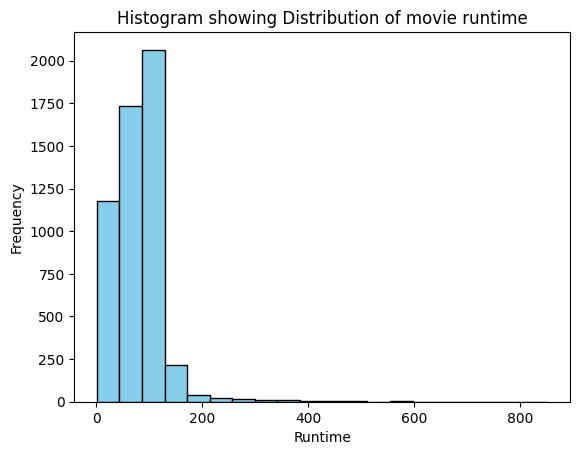

In [221]:
# Plot the distribution of the rating column
plt.hist(df['runtime'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Runtime')  # Corrected: Use plt.xlabel instead of plt.set_xlabel
plt.ylabel('Frequency')  # Corrected: Use plt.ylabel instead of plt.set_ylabel
plt.title('Histogram showing Distribution of movie runtime')  # Corrected: Use plt.title instead of plt.set_title

# Display the histogram
plt.show()

Let us check the descriptive statistics of the `runtime` column

In [222]:
# to check the descriptive statistics of the column
df['runtime'].describe()

count    5305.000000
mean       78.499529
std        49.608718
min         1.000000
25%        45.000000
50%        82.000000
75%       100.000000
max       853.000000
Name: runtime, dtype: float64

We would like to observe the runtime using a boxplot

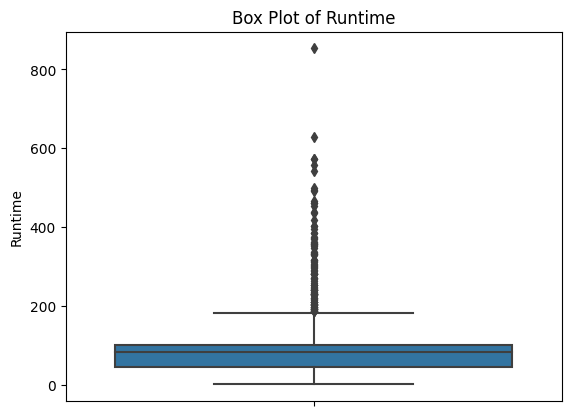

In [223]:
#to check using the box plot 
sns.boxplot(data=df, y='runtime')
plt.ylabel('Runtime')
plt.title('Box Plot of Runtime')
plt.grid(False)
plt.show()

From the boxplot above, it is saying that values above 200 minutes are outliers. 

According to [Nashville Film Institute](https://www.nfi.edu/how-long-does-it-take-to-make-a-movie/#:~:text=To%20throw%20a%20brief%20answer,or%20the%20production%20of%20music.), as stated below

> *To throw a brief answer (in case you're in a hurry), the average length of a feature film is around **120 minutes**. This figure is typically taken for an introductory film, and it excludes time spent on special effects or the production of music.*


This would be used to clean my column. From more research, the ideal range for a movie should be minimum of 90 minutes to 120 minutes. I would be working 120 minutes for my analysis

In [224]:
# to get out upper and lower limit
limit = 120

# to replace the outliers
df['runtime'] = np.where(df['runtime'] < limit,
   limit, df['runtime'])


# to check if it worked
df['runtime'].describe()

count    5305.000000
mean      124.744958
std        30.814080
min       120.000000
25%       120.000000
50%       120.000000
75%       120.000000
max       853.000000
Name: runtime, dtype: float64

For the upper limit, there is clearly something up with over 800 minutes for a movie which is over 13 hours, This is incredibly much, therefore considered as an outlier. We cant put a maximum allowable value for movie runtime but we are going to cap our ratings column by using upper limit as **"mean plus Five standard deviations"**

This idea was referenced from [Career Foundry](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=After%20checking%20the%20data%20and,not%20the%20dataset%20has%20outliers.)

In [225]:
upper_limit = df['runtime'].mean() + 5*df['runtime'].std()

print(upper_limit)

278.8153577157407


In [226]:
# to replace the upper outliers with the upper limit
df['runtime'] = np.where(df['runtime'] > upper_limit, upper_limit, df['runtime'])

To check its descriptive statistics

In [227]:
df['runtime'].describe()

count    5305.000000
mean      123.646635
std        19.252519
min       120.000000
25%       120.000000
50%       120.000000
75%       120.000000
max       278.815358
Name: runtime, dtype: float64

Next step is to check if there are null values in the column

In [228]:
df['runtime'].isna().sum()

1512

We would be replacing the null values with the mean

In [229]:
# Calculate the mean of the column
mean_value = round(df['runtime'].mean())

# Replace null values with the mean
df['runtime'].fillna(mean_value, inplace=True)


# to check if it worked
df['runtime'].isna().sum()

0

**Cleaning Task 7 done!!**

### Cleaning Task 8: Clean the gross column

Before attempting to clean the column, let us check the kind of values present in the column

In [230]:
df.gross.value_counts().index

Index(['$0.01M', '$0.02M', '$0.00M', '$0.03M', '$0.04M', '$0.08M', '$0.05M',
       '$0.10M', '$0.15M', '$0.09M',
       ...
       '$181.17M', '$77.22M', '$18.34M', '$97.10M', '$486.30M', '$37.77M',
       '$44.82M', '$21.36M', '$54.76M', '$10.40M'],
      dtype='object', length=328)

To remove the '$' and the 'M' and convert to millions

In [231]:
# remove '$' and 'M', and convert to million
df['gross'] = df['gross'].str.replace('$', '', regex=True)\
                        .str.replace('M', '', regex=True)\
                        .astype(float)\
                        .mul(1e6)

# to check if the changes were made
df.gross.value_counts().index

Float64Index([    10000.0,     20000.0,         0.0,     30000.0,     40000.0,
                  80000.0,     50000.0,    100000.0,    150000.0,     90000.0,
              ...
              181170000.0,  77220000.0,  18340000.0,  97100000.0, 486300000.0,
               37770000.0,  44820000.0,  21360000.0,  54760000.0,  10400000.0],
             dtype='float64', length=328)

To check if there are null values in the gross column

In [232]:
df['gross'].isna().sum()

6365

To handle this null values, I would replace them with zero

In [233]:
# Replace null values with zero
df['gross'].fillna(0, inplace=True)

# to check if it worked
df['gross'].isna().sum()

0

**Cleaning Task 8 Done!!**

**Hurray!!** The dataset is now clean. Guess who saved the enchanted world. **WE DID!** 

**WE ARE THE DATA WIZARDS!!**

<img src = "downloader.jpg" height="300px" width="700px" />

FInally to export the cleaned dataset

In [234]:
# export the data to csv file
df.to_csv('movies_team13_cleaned.csv', index=False)